In [164]:
"""
NAMA : MAULANA MUHAMMAD
TUGAS KNN + FEATURE SELECTION
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [165]:
df.drop(columns=["Pregnancies", "BloodPressure", "SkinThickness", "BMI"], inplace=True)
df.dropna(inplace=True)
df

,Glucose,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,148,0,0.627,50,1
1,85,0,0.351,31,0
2,183,0,0.672,32,1
3,89,94,0.167,21,0
4,137,168,2.288,33,1
...,...,...,...,...,...
762,89,0,0.142,33,0
763,101,180,0.171,63,0
764,122,0,0.340,27,0
765,121,112,0.245,30,0


<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

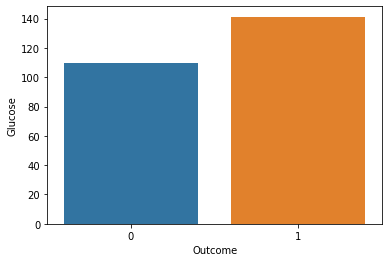

In [166]:
import seaborn as sns
sns.barplot(x="Outcome", y="Glucose", data=df, ci=None)

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

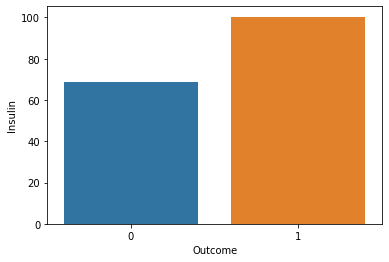

In [167]:
sns.barplot(x='Outcome', y='Insulin', data=df, ci=None)

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

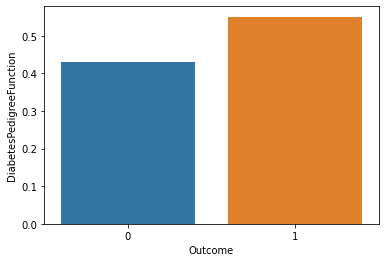

In [168]:
sns.barplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, ci=None)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

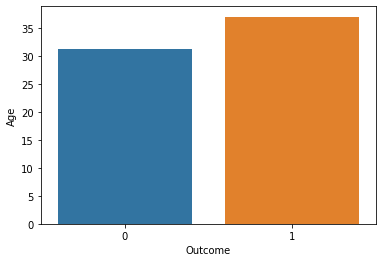

In [169]:
sns.barplot(x='Outcome', y='Age', data=df, ci=None)

In [170]:
#X = Featurs ; Y = Class
X=df.iloc[:,:4]
X

,Glucose,Insulin,DiabetesPedigreeFunction,Age
0,148,0,0.627,50
1,85,0,0.351,31
2,183,0,0.672,32
3,89,94,0.167,21
4,137,168,2.288,33
...,...,...,...,...
762,89,0,0.142,33
763,101,180,0.171,63
764,122,0,0.340,27
765,121,112,0.245,30


In [171]:
Y = df.iloc[:,4]
Y

0      1
1      0
2      1
3      0
4      1
      ..
762    0
763    0
764    0
765    0
766    1
Name: Outcome, Length: 767, dtype: int64

In [172]:
#Metode Wrapp -> RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(X,Y)

print("Num Features: %s" %(fit.n_features_))
print("Selected Features: %s" %(fit.support_))
print("Feature Ranking: %s" %(fit.ranking_))

dfscores = pd.DataFrame(fit.support_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns=["Attr", "Score"]
print(featureScores.nlargest(7,'Score'))

Num Features: 2
Selected Features: [ True False  True False]
Feature Ranking: [1 3 1 2]
                       Attr  Score
0                   Glucose   True
2  DiabetesPedigreeFunction   True
1                   Insulin  False
3                       Age  False


In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
print(len(X_train))
print(len(X_test))

613
154


In [174]:
#Normalisasi
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)
print(X_test)

[[-0.13558616 -0.68391029 -0.87904409 -0.86736368]
 [ 0.07784019 -0.68391029 -0.84968371 -0.35620143]
 [ 1.14497193 -0.68391029 -0.67352141  0.9217042 ]
 ...
 [-0.80635469 -0.68391029 -0.99354958 -1.0377511 ]
 [-1.20271791 -0.34231735 -0.59718442 -0.78216997]
 [-0.19656512 -0.68391029 -0.15971473  0.32534824]]
[[ 0.13881914 -0.68391029 -0.98474146 -0.78216997]
 [ 0.07784019  1.36564731  1.15563038 -0.95255739]
 [ 0.71811923  0.85325791 -0.44451044  1.09209162]
 [-0.47097043  0.52874462 -0.92014862 -0.95255739]
 [-0.71488625  0.09321363  1.12920604 -0.1006203 ]
 [ 0.50469288 -0.68391029 -0.74985841  2.19960984]
 [ 0.1997981  -0.68391029 -0.87023597  1.51806017]
 [-0.62341782 -0.07758283 -0.47680686 -0.61178256]
 [ 0.04735071  0.22131098  0.67705616 -0.95255739]
 [ 0.10832966  1.06675349  1.14095019 -0.27100772]
 [-0.86733364 -0.68391029 -1.04639827 -0.78216997]
 [-0.6539073  -0.05196336 -0.60892857 -0.61178256]
 [ 1.78525097  0.67392162 -0.09218585 -0.95255739]
 [ 1.51084567  1.23754996

In [175]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [176]:
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

[0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0]
524    0
673    0
689    1
59     0
638    1
      ..
711    0
368    0
214    1
744    0
354    0
Name: Outcome, Length: 154, dtype: int64


In [177]:
#Evaluasi model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[89 12]
 [29 24]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       101
           1       0.67      0.45      0.54        53

    accuracy                           0.73       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.72      0.73      0.72       154



In [178]:
#Melakukan ploting error
error=[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

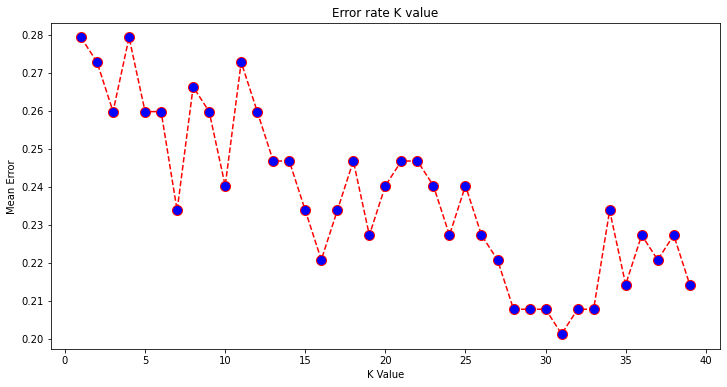

In [179]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color="red", linestyle="dashed", marker="o",
        markerfacecolor="blue", markersize=10)
plt.title("Error rate K value")
plt.xlabel("K Value")
plt.ylabel("Mean Error")

In [ ]:
"""
Analisa :
1. Import library pandas, numpy dan matplotlib, pilih dataset diabetes.csv
2. Melakukan drop kolom Pregnancies, BloodPressure, SkinThickness, BMI
3. Kemudian barplot outcome dengan Glucose, Insulin, DiabetesPedigreeFunction, dan Age
4. Memisahkan X sebagai feature dan Y sebagai class, yang menjadi feature adalah Glucose, Insulin, DiabetesPedigreeFunction dan Age, menjadi class adalah Outcome
5. Melakukan feature selection dengan metode Wrapp RFE
6. Memisahkan data train dan test
7. Melakukan normalisasi
8. Setelah itu melakukan metode KNN, mengevaluasi model, sampai dengan ploating error
"""